In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 2. Reshape to (28,28,1) because CNN expects 2D with channels
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [4]:
#3. One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# 4. Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

C:\Users\Nandana\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
# 6. Train
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9492 - loss: 0.1666 - val_accuracy: 0.9838 - val_loss: 0.0494
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9856 - loss: 0.0477 - val_accuracy: 0.9880 - val_loss: 0.0384
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9894 - loss: 0.0331 - val_accuracy: 0.9895 - val_loss: 0.0359
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9929 - loss: 0.0233 - val_accuracy: 0.9912 - val_loss: 0.0358
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9937 - loss: 0.0186 - val_accuracy: 0.9903 - val_loss: 0.0350


In [8]:
# 7. Evaluate
loss, acc = model.evaluate(x_test, y_test)
print("Test accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9882 - loss: 0.0347
Test accuracy: 0.9882000088691711


In [9]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

def preprocess_digit_image_for_cnn(path, invert=True, threshold=False):
    img = Image.open(path).convert("L")

    if invert:
        img = ImageOps.invert(img)

    img = img.resize((28, 28))
    arr = np.array(img) / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 28, 28, 1)  # CNN expects 4D
    return arr

In [11]:
arr = preprocess_digit_image_for_cnn("Zero.jpg", invert=True, threshold=False)

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted digit: 0


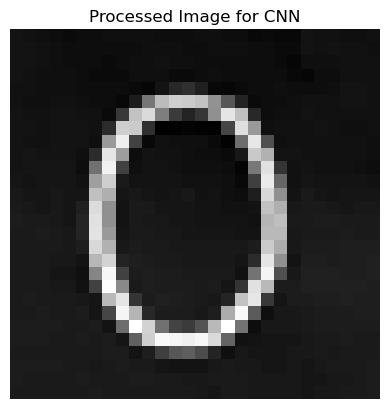

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted digit: 0


In [12]:
arr = preprocess_digit_image_for_cnn("Zero.jpg", invert=True, threshold=False)

plt.imshow(arr.reshape(28,28), cmap="gray")
plt.title("Processed Image for CNN")
plt.axis("off")
plt.show()

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

In [14]:
arr = preprocess_digit_image_for_cnn("One.jpg", invert=True, threshold=False)

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted digit: 1


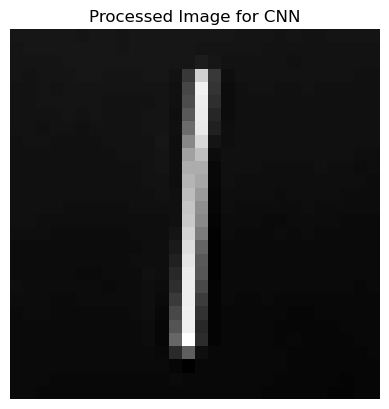

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted digit: 1


In [15]:
arr = preprocess_digit_image_for_cnn("One.jpg", invert=True, threshold=False)

plt.imshow(arr.reshape(28,28), cmap="gray")
plt.title("Processed Image for CNN")
plt.axis("off")
plt.show()

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

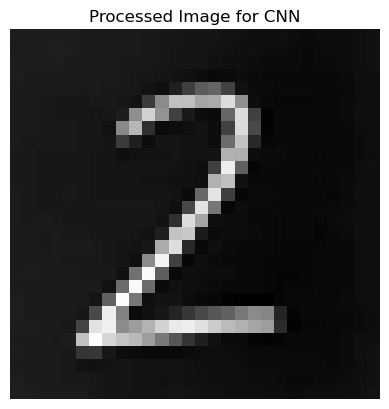

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted digit: 2


In [16]:
arr = preprocess_digit_image_for_cnn("Two.jpg", invert=True, threshold=False)

plt.imshow(arr.reshape(28,28), cmap="gray")
plt.title("Processed Image for CNN")
plt.axis("off")
plt.show()

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

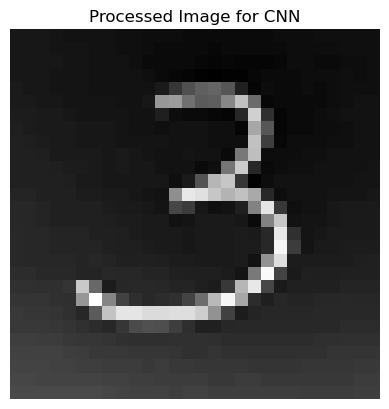

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted digit: 3


In [17]:
arr = preprocess_digit_image_for_cnn("Three.jpg", invert=True, threshold=False)

plt.imshow(arr.reshape(28,28), cmap="gray")
plt.title("Processed Image for CNN")
plt.axis("off")
plt.show()

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

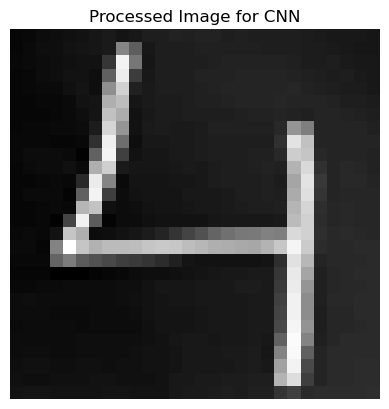

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted digit: 4


In [18]:
arr = preprocess_digit_image_for_cnn("Four.jpg", invert=True, threshold=False)

plt.imshow(arr.reshape(28,28), cmap="gray")
plt.title("Processed Image for CNN")
plt.axis("off")
plt.show()

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

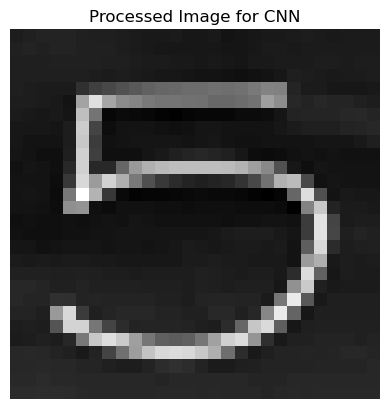

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted digit: 0


In [19]:
arr = preprocess_digit_image_for_cnn("Five.jpg", invert=True, threshold=False)

plt.imshow(arr.reshape(28,28), cmap="gray")
plt.title("Processed Image for CNN")
plt.axis("off")
plt.show()

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

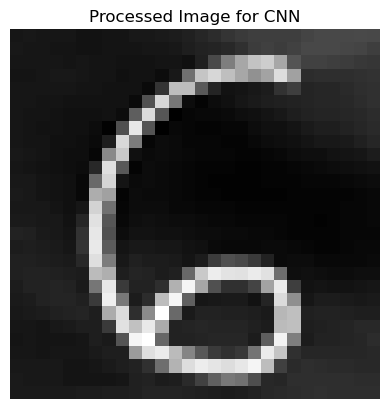

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 6


In [20]:
arr = preprocess_digit_image_for_cnn("Six.jpg", invert=True, threshold=False)

plt.imshow(arr.reshape(28,28), cmap="gray")
plt.title("Processed Image for CNN")
plt.axis("off")
plt.show()

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

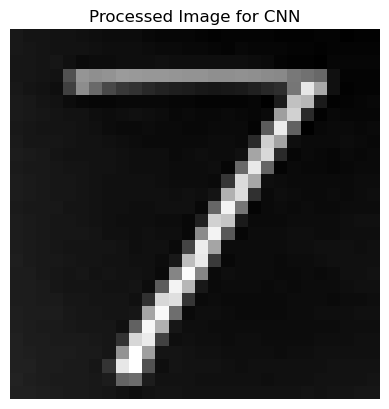

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted digit: 1


In [21]:
arr = preprocess_digit_image_for_cnn("Seven.jpg", invert=True, threshold=False)

plt.imshow(arr.reshape(28,28), cmap="gray")
plt.title("Processed Image for CNN")
plt.axis("off")
plt.show()

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

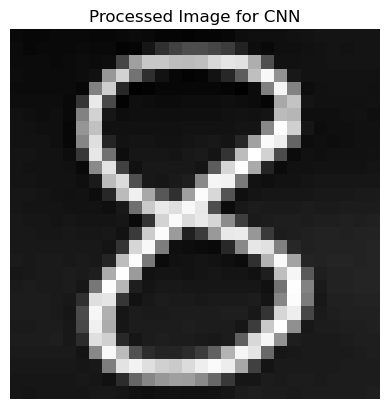

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted digit: 8


In [22]:
arr = preprocess_digit_image_for_cnn("Eight.jpg", invert=True, threshold=False)

plt.imshow(arr.reshape(28,28), cmap="gray")
plt.title("Processed Image for CNN")
plt.axis("off")
plt.show()

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))

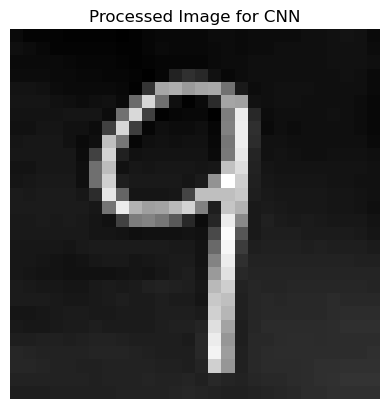

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted digit: 4


In [23]:
arr = preprocess_digit_image_for_cnn("Nine.jpg", invert=True, threshold=False)

plt.imshow(arr.reshape(28,28), cmap="gray")
plt.title("Processed Image for CNN")
plt.axis("off")
plt.show()

pred = model.predict(arr)
print("Predicted digit:", np.argmax(pred))